In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [76]:
cuaca=pd.read_csv('Prakiraan_Cuaca.csv')


In [77]:
cuaca.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


Setiap baris dalam dataset mewakili satu pengamatan kondisi cuaca pada suatu waktu, dan kolom-kolomnya adalah atribut-atribut yang diamati pada pengamatan tersebut. Berikut adalah penjelasan dari setiap variabelnya:
1. Temperature: Suhu udara dalam satuan derajat Celsius pada saat pengamatan
2. Humidity: Kelembapan relatif udara dalam persen(%).
3. Wind_Speed: Kecepatan angin dalam satuan meter per detik (m/s).
4. Cloud_Cover: Persentase tutupan awan di langit (%).
5. Pressure: Tekanan udara pada saat pengamatan, dalam satuan hPa (hectopascal).
6. Rain: Label target yang menunjukkan apakah terjadi hujan (rain) atau tidak (no rain).

Dataset ini memberikan informasi penting tentang kondisi cuaca berdasarkan beberapa variabel meteorologi, dan dapat digunakan untuk memprediksi kemungkinan terjadinya hujan. Dengan menganalisis hubungan antara variabel-variabel seperti suhu, kelembapan, kecepatan angin, tutupan awan, dan tekanan udara, model prediktif seperti Naive Bayes dan K-Nearest Neighbors dapat digunakan untuk membantu dalam pengambilan keputusan terkait prakiraan cuaca.



In [78]:
cuaca.tail(15)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
2485,23.836261,78.863261,19.713528,38.562791,1034.098247,no rain
2486,28.550233,64.044753,8.266152,95.548263,1031.376699,no rain
2487,32.428647,95.860543,7.919347,76.534181,994.238794,no rain
2488,19.500864,34.786267,15.140360,52.550272,985.124592,no rain
2489,25.040837,40.905769,1.254794,99.104320,991.833351,no rain
2490,27.365273,43.619778,3.390757,69.498333,980.694046,no rain
2491,11.081767,45.470035,14.397602,19.460689,1032.905052,no rain
2492,30.019013,46.479933,6.393025,11.403676,994.319633,no rain
2493,19.435755,40.699514,14.033566,26.211576,1010.480761,no rain
2494,26.755974,78.504229,0.457207,73.550223,986.482791,no rain


Dataset ini memiliki total pengamatan 2499

In [79]:
count_values = cuaca['Rain'].value_counts()
count_values

,count
Rain,
no rain,2186
rain,314


In [80]:
# Menghitung rata-rata berdasarkan nilai 'Rain'
mean_by_Rain = cuaca.groupby('Rain').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Rain'
print(mean_by_Rain)

         Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure
Rain                                                                 
no rain    23.319913  61.455151    9.909297    46.058162  1014.249021
rain       17.442619  84.480176    9.885073    74.720123  1014.753118


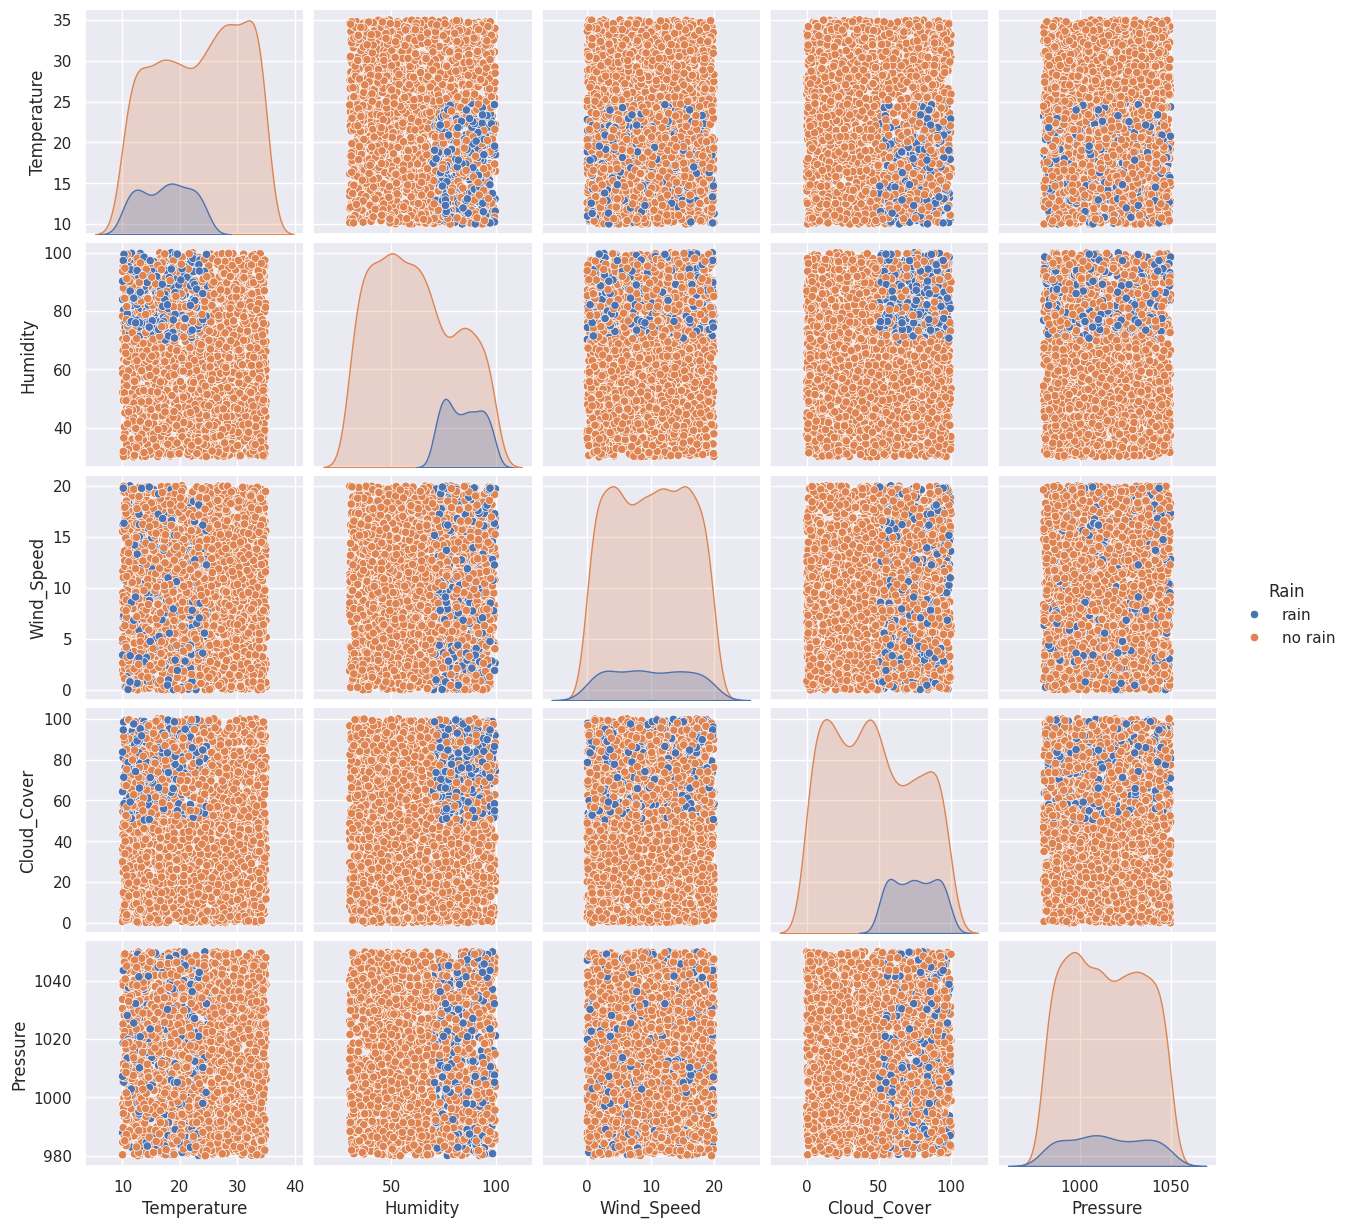

In [81]:
#visualisasi. warna dibedakan berdasarkan rainnya apakah rain atau no rain
sns.pairplot(cuaca, vars=['Temperature','Humidity',	'Wind_Speed',	'Cloud_Cover',	'Pressure'], hue='Rain')

Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset cuaca. Di sini, variabel-variabel yang dipilih untuk dianalisis adalah 'Temperature', 'Humidity',	'Wind_Speed',	'Cloud_Cover', dan 'Pressure'.

1. sns.pairplot: Ini adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel.
2. cuaca: Merupakan dataset yang digunakan untuk membuat pairplot.
3. vars: Digunakan untuk menentukan variabel-variabel yang ingin dimunculkan dalam pairplot.
4. hue='Rain': Variabel 'Rain' akan digunakan untuk membedakan data. Dalam hal ini, warna plot akan diberikan berdasarkan nilai dari kolom 'Rain', yaitu apakah  suatu kondisi cuacanya akan hujan (rain) atau tidak hujan (no rain).

Dengan menggunakan pairplot dan membagi warna berdasarkan 'Rain', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah suatu kondisi cuacanya akan hujan (rain) atau tidak hujan (no rain). Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan keberadaan kondisi cuaca pada dataset.



In [82]:
import seaborn as sns
import pandas as pd

#Mengubah kolom 'Rain' menjadi numerik: 'rain'->1, 'no rain'->0
cuaca['Rain']=cuaca['Rain'].map({'rain':1, 'no rain':0})

# Menghitung korelasi antara setiap variabel dengan 'Rain'
correlation_with_rain = cuaca.corr()['Rain'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Rain'
print(correlation_with_rain)

Rain           1.000000
Humidity       0.382464
Cloud_Cover    0.326216
Pressure       0.008273
Wind_Speed    -0.001389
Temperature   -0.265882
Name: Rain, dtype: float64


Output ini adalah nilai korelasi antara variabel 'Rain' (kolom target) dengan setiap variabel lain dalam dataset. Nilai korelasi ini berkisar antara -1 hingga 1.

Korelasi Positif: Nilai korelasi yang mendekati 1 menunjukkan adanya hubungan positif yang kuat. Misalnya, jika variabel Humidity memiliki nilai korelasi sebesar  0.382464 dengan 'Rain'. Ini menunjukkan bahwa ada hubungan positif yang cukup kuat antara kelembapan udara dan kemungkinan terjadinya hujan (Rain=1). Semakin tinggi kelembapan udara, semakin besar kemungkinan terjadinya hujan.

Korelasi Negatif: Nilai korelasi mendekati -1 menunjukkan hubungan negatif yang kuat. Contohnya, jika Temperature memiliki korelasi sebesar -0.265882 terhadap Rain. Ini menunjukkan bahwa ada hubungan negatif yang cukup kuat antara suhu udara dan kemungkinan tidak terjadi hujan (Rain=-1). Semakin tinggi suhu udara, kemungkinan terjadinya hujan justru menurun.

Korelasi Mendekati 0: Korelasi mendekati 0 menandakan hubungan yang lemah atau tidak signifikan antara variabel tersebut dengan kejadian hujan. Misalnya, dalam kasus ini variabel 'Pressure' dan 'Wind_Speed' memiliki korelasi yang rendah terhadap 'Rain' (kurang dari 0,1), maka variabel tersebut menunjukkan hubungan yang lemah atau tidak terlalu berpengaruh dalam memprediksi hujan.

Ringkasnya, nilai korelasi ini membantu untuk memahami seberapa besar pengaruh masing-masing variabel cuaca terhadap variabel target 'Rain' (hujan atau tidak hujan). Semakin tinggi nilai korelasi (positif atau negatif), semakin kuat hubungan antara variabel tersebut dengan kemungkinan terjadinya hujan pada dataset.


# Memisahkan Variabel X dan y

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur) dari variabel dependen (Rain) dalam dataset.

1. Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur. Fitur-fitur ini adalah atribut-atribut atau informasi-informasi yang digunakan oleh model untuk melakukan prediksi atau klasifikasi.

2. Data y (Rain/Labels): Merupakan variabel dependen yang ingin diprediksi oleh model. Ini berisi label atau kelas yang ingin diidentifikasi atau diprediksi berdasarkan fitur-fitur yang ada dalam data X.


Pemisahan ini penting karena:

1. Melatih Model: Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.

2. Validasi dan Evaluasi: Data y (Rain) dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan target dari fitur-fitur, kita dapat mengevaluasi seberapa baik model dapat memprediksi label yang benar untuk data baru yang belum pernah dilihat sebelumnya.

In [83]:
#memisahkan data menjadi variabel x dan y
X=cuaca.drop(['Rain'], axis=1)
y=cuaca['Rain']

# Membagi Data Menjadi Data Training Dan Testing

Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.

**Besarnya pembagian data:**

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

1. Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

2. Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:
1. X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar)
2. y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil)
3. test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing.
4. random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.

Hasil dari fungsi train_test_split adalah empat keluaran:
1. X_train: Data training untuk fitur-fitur.
2. X_test: Data testing untuk fitur-fitur.
3. y_train: Data training untuk target atau label.
4. y_test: Data testing untuk target atau label.

Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [85]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.98201604 0.13766732 0.75689223 0.46359455 0.88671339]
 [0.03036087 0.34960483 0.33259564 0.51329227 0.62980006]
 [0.35952952 0.68327233 0.09730975 0.29538287 0.94501851]
 ...
 [0.33611768 0.98711949 0.7528719  0.07586879 0.29255907]
 [0.47943796 0.62663225 0.79143054 0.00192492 0.52462998]
 [0.52838151 0.09563962 0.14793109 0.46075881 0.87861228]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

1. MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train).
2. MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test).

Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus:
1. fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training.
2. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

# NAIVE BAYES

In [86]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [87]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [88]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.964

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [91]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9540


# Proses membuat model dengan Neural Network

In [92]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=9 menunjukkan bahwa validasi silang dilakukan dengan 9 lipatan (9-fold cross-validation).

Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [93]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.001, 'max_iter': 200}


In [94]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50, 30),learning_rate_init=0.001,max_iter=200)

clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 30))

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

1. hidden_layer_sizes=(50, 30): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50, 30) berarti terdapat satu hidden layersberisi 50 dan neuron.
2. learning_rate_init=0.001: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi
3. max_iter=200: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

Dengan konfigurasi ini, jaringan saraf dilatih menggunakan fitur-fitur seperti suhu, kelembapan, tekanan udara, kecepatan angin, dan tutupan awan untuk mengklasifikasikan apakah cuaca tersebut akan menghasilkan hujan (Rain) atau tidak.



In [95]:
y_pred = clf.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[433   1]
 [  7  59]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       434
           1       0.98      0.89      0.94        66

    accuracy                           0.98       500
   macro avg       0.98      0.95      0.96       500
weighted avg       0.98      0.98      0.98       500



Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (Prakiraan cuaca) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score.

Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:
1. **Precision**. 0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 98% di antaranya adalah benar-benar kelas negatif. 1 (Kelas Positif): Sekitar 98% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.
2. **Recall**. 0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 100% dari mereka. 1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model hanya dapat mengenali sekitar 86% dari mereka.
3. **F1-Score**: F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.99, sedangkan untuk kelas 1 adalah 0.92. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.
4. **Accuracy**: Akurasi model adalah sekitar 98%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.
5. **Interpretasi**: Meskipun akurasi secara keseluruhan adalah 98%, melihat pada recall untuk kelas 1 (0.86) menunjukkan bahwa model memiliki performa yang lebih rendah dalam mengidentifikasi kasus positif (1). Terlihat bahwa model memiliki kemampuan yang baik dalam memprediksi kasus negatif (0) tetapi kurang baik dalam memprediksi kasus positif (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kelas 0 dan 1 bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model.

In [97]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.984

Output 0.984 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.984 berarti bahwa model berhasil memprediksi dengan benar sekitar 98,4% dari semua sampel pada data uji (y_test) yang telah digunakan.

# K-Nearest Neighbors (KNN)

In [98]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('Prakiraan_Cuaca.csv')
print("5 Data Teratas:")
print(df.head())

# Pisahkan fitur dan label (ubah sesuai kolom pada dataset)
# Ganti 'status' dengan nama kolom target klasifikasi yang sesuai pada dataset.
# Misalnya, jika kolom target adalah 'Rain', maka ubah kode menjadi:
X = df.drop('Rain', axis=1)  # fitur
y = df['Rain']               # label

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # kamu bisa ubah nilai k
knn.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred = knn.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

5 Data Teratas:
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain

Confusion Matrix:
[[436   7]
 [  6  51]]

Classification Report:
              precision    recall  f1-score   support

     no rain       0.99      0.98      0.99       443
        rain       0.88      0.89      0.89        57

    accuracy                           0.97       500
   macro avg       0.93      0.94      0.94       500
weighted avg       0.97      0.97      0.97       500



KNN (K-Nearest Neighbors) adalah algoritma klasifikasi berbasis instance yang bekerja dengan prinsip mencari sejumlah tetangga terdekat dari data baru yang ingin diprediksi. Kelas terbanyak dari tetangga-tetangga tersebut kemudian digunakan sebagai prediksi.

Kelebihan KNN:

1. Sederhana dan intuitif,
2. Tidak memerlukan pelatihan eksplisit (lazy learner),
3. Cocok untuk dataset dengan jumlah fitur tidak terlalu banyak.

**Langkah-langkah Model KNN pada Dataset Prakiraan Cuaca**
1. Import library dan baca dataset ke dalam DataFrame 'df' yang menyimpan seluruh data pengamatan cuaca.
2. Pisahkan fitur dan label. 'X' berisi fiturfitur prediktor (selain kolom 'Rain') dan 'y' adalah label target (rain=1, no rain=0).
3. Membagi data menjadi latih dan uji. 80% data latih untuk melatih model. 20% data uji untuk menguji performa model.
4. Normalisasi data. KNN sangat bergantung pada jarak antar data, jadi semua fitur harus berada pada skala yang sama agar fitur dengan nilai besar tidak mendominasi. Oleh karena itu, digunakan StandardScaler untuk menormalkan data ke distribusi standar (mean = 0, std = 1).
5. Inisialisasi dan latih model KNN. Model KNN dibuat dengan k=5, artinya untuk setiap data uji, model akan: Mencari 5 tetangga terdekat dari data latih berdasarkan jarak Euclidean, dan mengambil kelas mayoritas dari tetangga-tetangga itu sebagai hasil prediksi.
6. Prediksi dan evaluasi. Model digunakan untuk memprediksi label dari data uji yang telah dinormalisasi.
7. Evaluasi hasil model. Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model pada data uji (Prakiraan cuaca) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score.

Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:
1. **Precision**. 0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 99% di antaranya adalah benar-benar kelas negatif. 1 (Kelas Positif): Sekitar 88% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.
2. **Recall**. 0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 98% dari mereka. 1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model hanya dapat mengenali sekitar 89% dari mereka.
3. **F1-Score**: F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.99, sedangkan untuk kelas 1 adalah 0.89. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.
4. **Accuracy**: Akurasi model adalah sekitar 97%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.
5. **Interpretasi**: Meskipun akurasi secara keseluruhan adalah 97%, melihat pada recall untuk kelas 1 (0.89) menunjukkan bahwa model memiliki performa yang lebih rendah dalam mengidentifikasi kasus positif (1). Terlihat bahwa model memiliki kemampuan yang baik dalam memprediksi kasus negatif (0) tetapi kurang baik dalam memprediksi kasus positif (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kelas 0 dan 1 bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model.

In [99]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.974

Output 0.974 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.974 berarti bahwa model berhasil memprediksi dengan benar sekitar 97,4% dari semua sampel pada data uji (y_test) yang telah digunakan.

# Visualisasi Naive Bayes dan KNN

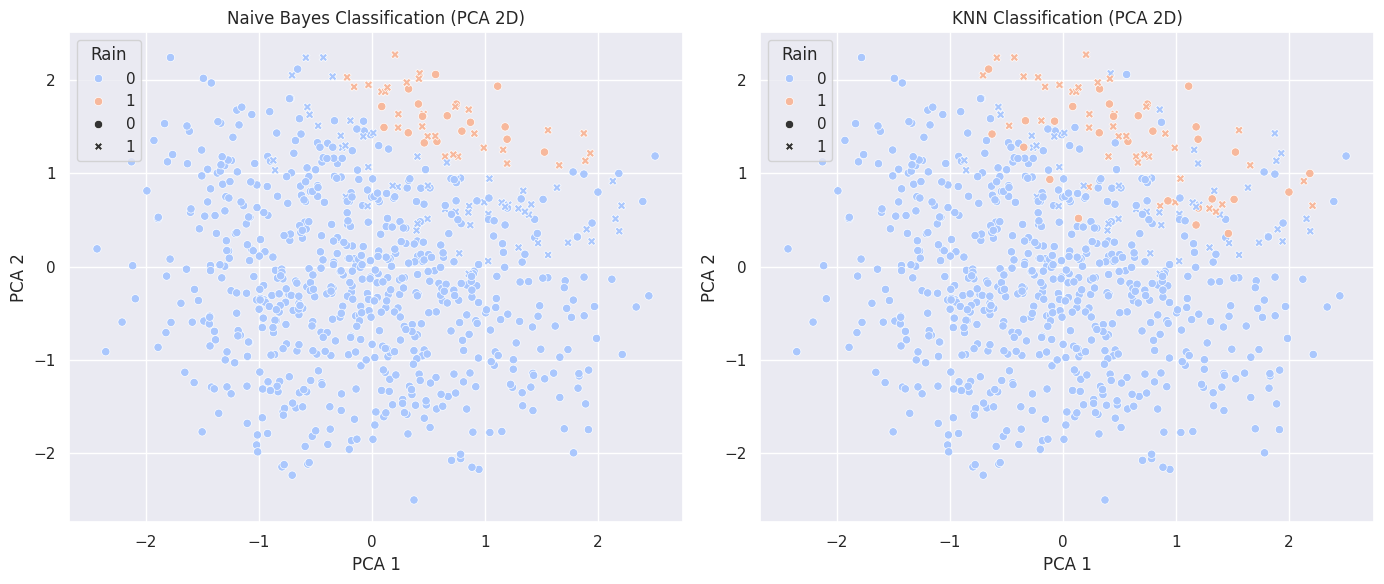

In [100]:
# Langkah 1: Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Langkah 2: Upload file
# from google.colab import files # This is commented out as it is not needed in a Jupyter notebook on Linux
# uploaded = files.upload()

# Langkah 3: Load dataset
df = pd.read_csv('Prakiraan_Cuaca.csv')
df.head()

# Langkah 4: Pra-pemrosesan
label_encoder = LabelEncoder()
# The 'Rain' column was intended to be used here for encoding (from previous code)
df['Rain'] = label_encoder.fit_transform(df['Rain'])  # rain=1, no rain=0

# Using 'Rain' as target variable y (consistent with previous code examples)
X = df.drop('Rain', axis=1)
y = df['Rain']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# PCA untuk reduksi dimensi
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Langkah 5: Latih model
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
y_pred_nb = nb_model.predict(X_test_pca)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_test_pca)

# Langkah 6: Visualisasi
plt.figure(figsize=(14, 6))

# Visualisasi Naive Bayes
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_nb, palette='coolwarm', style=y_test)
plt.title('Naive Bayes Classification (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Visualisasi KNN
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_knn, palette='coolwarm', style=y_test)
plt.title('KNN Classification (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

# Perbandingan Naive Bayes dan KNN

<ipython-input-102-f312d6dd9863>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Set2')


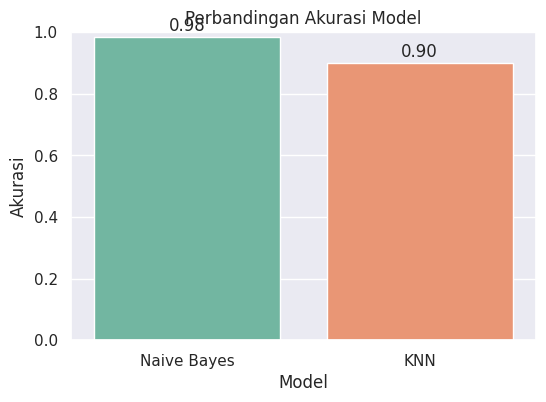

In [102]:
# Calculate accuracy for KNN
acc_knn = round(accuracy_score(y_test, y_pred_knn), 3)

# Assuming you have the Naive Bayes predictions (y_pred_nb) from previous code
# If not, you need to run the Naive Bayes model first to get y_pred_nb
# For example:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train_scaled, y_train) # Assuming scaled data is used for Naive Bayes too
# y_pred_nb = nb.predict(X_test_scaled)

# acc_nb = round(accuracy_score(y_test, y_pred_nb), 3) # Calculate accuracy for Naive Bayes

# Visualisasi akurasi kedua model
plt.figure(figsize=(6, 4))
model_names = ['Naive Bayes', 'KNN']
accuracies = [0.984, acc_knn] # Replace 0.984 with acc_nb once calculated

sns.barplot(x=model_names, y=accuracies, palette='Set2')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)  # akurasi maksimum 100%
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.grid(True, axis='y')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()

Hasil akurasi Naive Bayes dan KNN sebagai berikut.
1. Akurasi Naive Bayes : 0.98 atau 98%
2. Akurasi KNN : 0.90 atau 90%

Hal ini berarti:
1. Model Naive Bayes memiliki akurasi lebih tinggi dibandingkan dengan KNN dalam konteks memprediksi apakah akan terjadi hujan atau tidak berdasarkan data cuaca.
2. untuk dataset ini, Naive Bayes lebih andal dalam mengenali pola distribusi data dan memberikan prediksi yang lebih tepat.


Namun, penting untuk dicatat:

1. KNN cenderung lebih sensitif terhadap jumlah fitur dan skala data, serta mungkin lebih baik pada data yang memiliki pola non-linear.
2. Naive Bayes memiliki keunggulan dalam kecepatan dan kesederhanaan karena asumsi independensi antar fitur, yang mungkin sangat cocok untuk dataset cuaca ini jika fitur-fiturnya memang tidak saling berkorelasi kuat.

Meskipun KNN memberikan hasil cukup baik, Naive Bayes menunjukkan performa yang lebih unggul dalam hal akurasi pada dataset ini. Pemilihan model akhir tetap harus mempertimbangkan konteks penggunaan, kompleksitas, dan kebutuhan real-time dari aplikasi prediksi cuaca tersebut.
